<a href="https://colab.research.google.com/github/AbbasHussain72/Wavelet-featre-extraction-/blob/main/current_wavelet_Transform_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.widgets import SpanSelector
import glob
import os
import re

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
!wget https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf 

font_files = fm.findSystemFonts()

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# Use your new font on all your plots.
plt.rc('font', family='serif ')


--2023-04-02 03:40:11--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf     [ <=>                ] 138.04K  --.-KB/s    in 0.007s  

2023-04-02 03:40:12 (18.3 MB/s) - ‘Times New Roman.ttf’ saved [141350]

--2023-04-02 03:40:12--  https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Arial.ttf’

Arial.ttf               [ <=>                ] 135.31K  --.-KB/s    in 0.009s  

2023-04-02 03:40:12 (14.4 MB/s) - ‘Arial.ttf’ saved [138562]



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read datafile and reset index
path = '/content/drive/MyDrive/goodbaddatanewbalanced.csv'
masterdata = pd.read_csv(path,sep='\t')
masterdata = masterdata.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df = masterdata

In [3]:
#read wavelet names file
path = '/content/drive/MyDrive/wavelet_names.csv'
md = pd.read_csv(path,sep=',')
wavelets= md['Wavelets'].tolist()

# Data Analysis

In [ ]:
#To take interested data
# df = masterdata[(masterdata['Tool'] == 'OP01') | (masterdata['Tool'] == 'OP02')| (masterdata['Tool'] == 'OP04')| (masterdata['Tool'] == 'OP07')| (masterdata['Tool'] == 'OP10')]

In [ ]:
#Function for balancing the data according to condition, tool and machine
# def balance(df,con1,con2,con3):
#   v = []
#   v = df[(df['Tool'] == con1) & (df['Condition'] == con2)& (df['Machine'] == con3)].index
#   f = df[(df['Tool'] == 'OP02') & (df['Condition'] == 'bad') & (df['Machine'] == 'M01')].index


#   # h = df[(df['Tool'] == 'con1') & (df['Condition'] == 'con2')].shape
#   bb = abs(len(v)- len(f))
#   v = v[0:bb]
#   new = df.loc[df.index.drop(v)]

#   return new

In [ ]:
# df = balance(df,'OP02','good','M01')


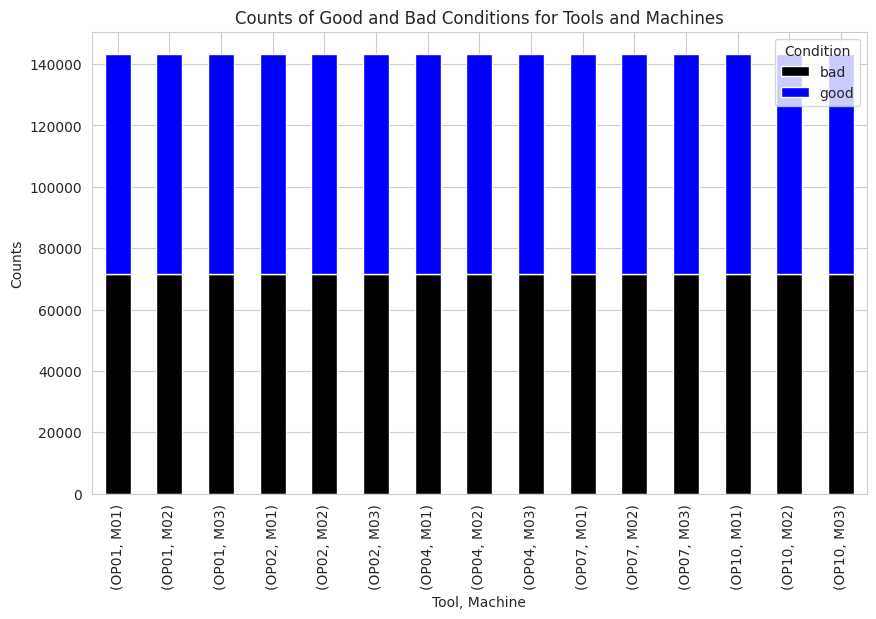

In [ ]:
# Grouped the data for bar plot
grouped = df.groupby(['Tool', 'Machine', 'Condition']).size().reset_index(name='counts')

# Pivot the data to create a stacked bar plot
pivot = grouped.pivot_table(index=['Tool', 'Machine'], columns='Condition', values='counts', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
colors = {'good': 'blue', 'bad': 'black'}
ax = pivot.plot.bar(stacked=True, color=[colors[c] for c in pivot.columns], figsize=(10, 6))

# Set the labels for the axes and the title
ax.set_xlabel('Tool, Machine')
ax.set_ylabel('Counts')
ax.set_title('Counts of Good and Bad Conditions for Tools and Machines')

# Show the plot
plt.show()


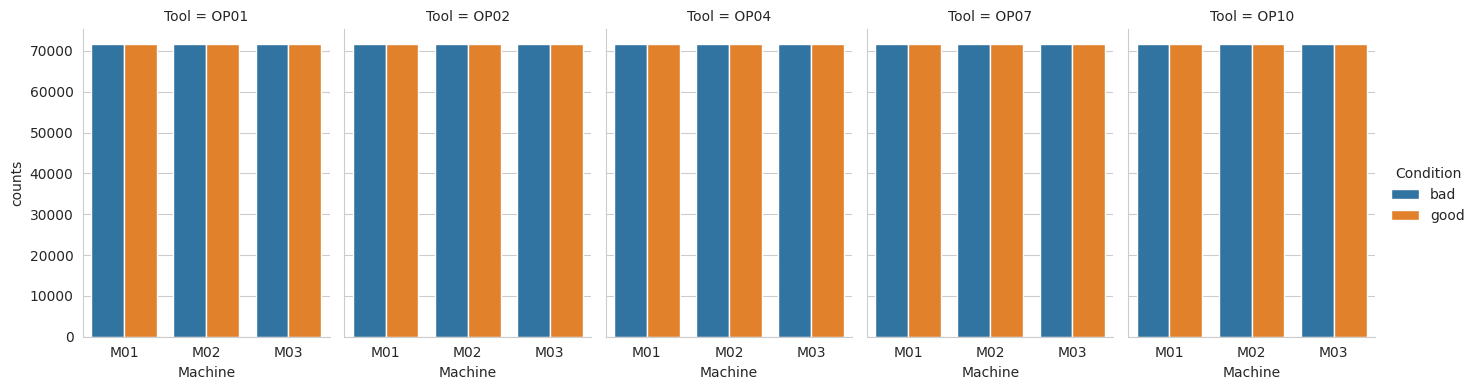

In [ ]:
import seaborn as sns
# Create a grouped bar chart
sns.catplot(x="Machine", y="counts", hue="Condition", col="Tool", data=grouped, kind="bar", height=4, aspect=.7)


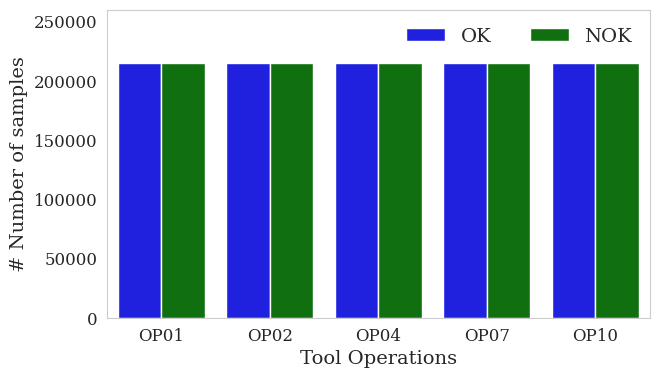

In [ ]:
#plotting the data
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
sns.set_style('whitegrid')
plt.figure(figsize = (7, 4),facecolor=(1, 1, 1))
# Use your new font on all your plots.
plt.rc('font', family='serif ')
#plot
sns.countplot(x = 'Tool',hue = 'Condition',data = df,palette=['blue', 'green'])
#plt.title('Number of samples', fontsize=16)
plt.xlabel('Tool Operations', fontsize=14)
plt.ylabel('# Number of samples', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

# Set the limits of the x and y axes
#plt.xlim(left=-0.5, right=2.5)
plt.ylim(bottom=0, top=260000)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Modify the labels
labels[0] = 'OK'
labels[1] = 'NOK'
# labels[2] = 'M03'

# Create a new legend with the modified labels
plt.legend(handles, labels, fontsize = 14,ncol=3,edgecolor='None')


# plt.savefig('databar_machine.tiff', dpi=300, bbox_inches="tight")
# plt.close()
plt.show()


In [ ]:
#Plotting the time series data sample
ff = masterdata[(masterdata['Tool'] == 'OP01') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good') & (masterdata['Repeat'] == 4)]
ff = ff.reset_index(drop = True)
ff1 = masterdata[(masterdata['Tool'] == 'OP01') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'bad') & (masterdata['Repeat'] == 0)]
ff1 = ff1.reset_index(drop = True)

In [ ]:
# subtracting the value to get zero starting value
ff.loc[:, 'Time (s)'] = ff['Time (s)'] - 4.9440
ff = ff.copy()
ff1.loc[:, 'Time (s)'] = ff1['Time (s)'] - 4.9440
ff1 = ff1.copy()

In [ ]:
# plt.rcParams['font.family']

['serif']

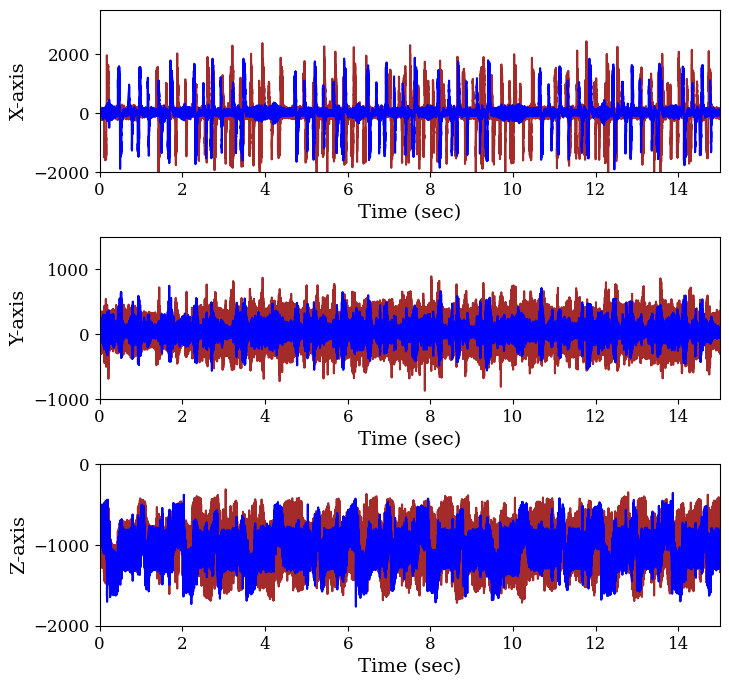

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Create a figure with 3 subplots arranged vertically
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
plt.rc('font', family='serif ')
# Plot data in each subplot
axs[0].plot(ff1['Time (s)'], ff1['X'],'brown')
axs[0].plot(ff['Time (s)'], ff['X'],'b')

axs[1].plot(ff1['Time (s)'], ff1['Y'],'brown')
axs[1].plot(ff['Time (s)'], ff['Y'],'b')

axs[2].plot(ff1['Time (s)'], ff1['Z'],'brown')
axs[2].plot(ff['Time (s)'], ff['Z'],'b')


# set the axis limit
axs[0].set_xlim(0,15)
axs[1].set_xlim(0,15)
axs[2].set_xlim(0,15)
axs[0].set_ylim(-2000,3500)
axs[1].set_ylim(-1000,1500)
axs[2].set_ylim(-2000,8)

# set label
axs[0].set_xlabel('Time (sec)', fontsize=14)
axs[0].set_ylabel('X-axis', fontsize=14)
axs[1].set_xlabel('Time (sec)', fontsize=14)
axs[1].set_ylabel('Y-axis', fontsize=14)
axs[2].set_xlabel('Time (sec)', fontsize=14)
axs[2].set_ylabel('Z-axis', fontsize=14)

# set font size of tick labels
axs[0].tick_params(axis='both', labelsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[2].tick_params(axis='both', labelsize=12)

# remove grid lines from subplot
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

# Set the overall title of the figure
#fig.suptitle('Three subplots', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()

# Save the plot in TIFF format with a resolution of 300 pixels and transparent background
# plt.savefig('plotsample.tiff', dpi=300, format='tiff', transparent=True)

plt.clf()


In [ ]:
 plt.close()

In [ ]:
# df.to_csv('goodbaddatanewbalanced.csv', sep='\t') # relative position

# FFT of the signal for decomposition level selection 

In [ ]:
#Plotting the time series data sample
# ff = masterdata[(masterdata['Tool'] == 'OP02') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good')]
ff = masterdata[(masterdata['Tool'] == 'OP02') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'bad') & (masterdata['Repeat'] == 0)]
ff = ff.reset_index(drop = True)

In [ ]:
ff.Repeat.unique()

array([0])

In [ ]:
ff.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z
0,M01,Feb2019,OP02,bad,0,0.0000,27.0,103.0,-1116.0
1,M01,Feb2019,OP02,bad,0,0.0005,29.0,-304.0,-1134.0
2,M01,Feb2019,OP02,bad,0,0.0010,-91.0,-80.0,-964.0
3,M01,Feb2019,OP02,bad,0,0.0015,-97.0,234.0,-954.0
4,M01,Feb2019,OP02,bad,0,0.0020,-17.0,97.0,-1030.0


In [ ]:
from scipy.fftpack import fft, ifft
def extract_fft_peak_frequency(data, sampling_rate):
    fft_data = np.fft.fft(data)
    N = len(fft_data)
    n = np.arange(N)
    T = N/sampling_rate
    freq = n/T 
    freqs = np.fft.fftfreq(len(data))
    
    peak_coefficient = np.argmax(np.abs(fft_data))
    peak_freq = freqs[peak_coefficient]
    peak_ampl = fft_data[peak_coefficient]
    a = abs(peak_freq * sampling_rate)
    b= abs(peak_ampl)
    
    
    
    # all_coefficient = (np.abs(fft_data) > 1000)
    # all_freq = freqs[all_coefficient]
    # all_ampl = fft_data[all_coefficient]
    
    # c = abs(all_freq * sampling_rate)
#     c = list(np.unique(c))
    
    # d = abs(all_ampl)
#     d = list(np.unique(d))
    
#     for i in range(1, (abs (len(a_amp) - len(a_fre)))+1):
#         del d[-i]
    
    return [a,b,N,freq,fft_data,T]


In [ ]:
#Signal FFT
from scipy import signal

sr = 2000
x = ff['X'].values
[p_fre,p_amp,N,freq,XX,T]= extract_fft_peak_frequency(x, sr)
# rms_ori = np.sqrt(np.mean(x**2))

# for raw data Get the one-sided specturm -->
n_oneside = N//2
# get the one side frequency -->
f_oneside = freq[:n_oneside]


# sos = signal.butter(2, p_fre, 'hp', fs=sr, output='sos')
# filtered = signal.sosfilt(sos, x)
# rms_filt = np.sqrt(np.mean(filtered**2))
# [f_p_fre,f_p_amp,f_a_fre,f_a_amp,f_N,f_freq,f_X]= extract_fft_peak_frequency(filtered, sr)

# print(p_fre)
# print(p_amp)

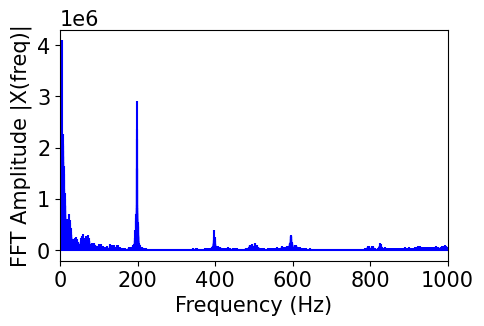

In [ ]:
#Ploting
fig = plt.figure(figsize=(5,3),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size':15})
plt.rc('axes', labelsize=15)  
plt.stem(f_oneside, np.abs(XX[:n_oneside]), 'b',markerfmt=" ", basefmt="b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,1000)
# plt.xlim(10,1000)
plt.grid(False)
plt.show()


#ax.legend(loc=1)
# fig.savefig('fft.png', dpi=300, bbox_inches="tight")

# Feature Extraction using Wavelet Packet Analysis

In [ ]:
df['Repeat'] = df['Repeat'].astype(str)
df['newcol'] = df['Machine'] +  df['Date'] + df['Tool'] + df['Condition'] + df['Repeat']
df = df.reset_index(drop = True)

In [ ]:
#df['Resultant'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)

In [ ]:
df.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z,newcol
0,M01,Aug2019,OP01,bad,0,7.1765,296.0,-111.0,-761.0,M01Aug2019OP01bad0
1,M01,Aug2019,OP01,bad,0,7.1770,58.0,353.0,-704.0,M01Aug2019OP01bad0
2,M01,Aug2019,OP01,bad,0,7.1775,142.0,402.0,-917.0,M01Aug2019OP01bad0
3,M01,Aug2019,OP01,bad,0,7.1780,27.0,253.0,-1171.0,M01Aug2019OP01bad0
4,M01,Aug2019,OP01,bad,0,7.1785,68.0,46.0,-1255.0,M01Aug2019OP01bad0


##  Number of segment for each file

In [ ]:
sum1=[]
window_size = 2000
step_size = 1000
for i in df['newcol'].unique():
    print (i)
    master_data =df[(df['newcol'] == i)]
    v = 0
    for j in range(0, master_data.shape[0] - window_size, step_size):
        v = v+1
    print(v)
        #num_segments = np.floor(len(master_data )/1000)
    sum1.append(v)
    #print(num_segments)
print(np.sum(sum1))

In [ ]:
# def compute_shannon_entropy(signal):
#     return -np.nansum(signal**2 * np.log(signal**2)) # nansum to exclude pesky terms like "0*np.log(0)"

In [ ]:
# Function to find the entropy of the signal

from scipy.stats import entropy
from math import log, e
import pandas as pd


def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

## Wavelet Feature Extraction

In [ ]:
#This will create the data list according to 'newcol'
import pywt
# w = pywt.Wavelet ('dmey')
level = 2  #3
 
#wavelet_feature_test = pd.DataFrame()
data = df
window_size = 2000
step_size = 1000

In [ ]:
data.shape

(2151330, 10)

In [ ]:
b = ['M01Aug2019OP01bad0',
'M01Feb2019OP01bad0']
for i in b:
    print(i)

M01Aug2019OP01bad0
M01Feb2019OP01bad0


In [ ]:
#trying new method for fast computation
import time
# print(w)

all_wavelet = pd.DataFrame()

for w in wavelets:
    start_time = time.time()
    wavelet_feature_all = pd.DataFrame()
    print(f"Running for {w}")

    for i in data['newcol'].unique():
        master_data = data[(data['newcol'] == i)]
        wavelet_feature_j = pd.DataFrame()

        for j in range(0, master_data.shape[0] - window_size, step_size):
            wavelet_feature = pd.DataFrame()
            df1 = pd.DataFrame()
            df1['X'] = master_data['X'].values[j: j + window_size]
            df1['Y'] = master_data['Y'].values[j: j + window_size]
            df1['Z'] = master_data['Z'].values[j: j + window_size]

            colvalue = ['X', 'Y', 'Z']
            wavelet_feature['Date'] = [max(master_data['Date'].values[j: j + window_size])]
            wavelet_feature['Machine'] = [max(master_data['Machine'].values[j: j + window_size])]
            wavelet_feature['Operation'] = [max(master_data['Tool'].values[j: j + window_size])]
            wavelet_feature['Condition'] = [max(master_data['Condition'].values[j: j + window_size])]
            wavelet_feature['Repeat'] = [max(master_data['Repeat'].values[j: j + window_size])]
            wavelet_feature['operationcondition'] = wavelet_feature['Operation'] + wavelet_feature['Condition']

            for val in colvalue:
                data_wave = df1[val].values
                wp = pywt.WaveletPacket(data_wave, w, maxlevel=level)  # Wavelet packet transformation
                packet_names = [node.path for node in wp.get_level(level, "freq")]
                for v in range(len(packet_names)):
                    new_wp = pywt.WaveletPacket(data=None, wavelet=w, maxlevel=level)
                    new_wp[packet_names[v]] = wp[packet_names[v]].data
                    reconstructed_signal = new_wp.reconstruct(update=False)  # Signal reconstruction from wavelet packet coefficients

                    # Wavelet feature
                    wavelet_feature = pd.concat([wavelet_feature,pd.DataFrame({'mean'+val+str(v): [np.mean(reconstructed_signal)],
                                                          'std'+val+str(v): [np.std(reconstructed_signal)],
                                                          'max'+val+str(v): [max(reconstructed_signal)],
                                                          'min'+val+str(v): [min(reconstructed_signal)],
                                                          'entropy'+val+str(v): [entropy2(reconstructed_signal, 2)],
                                                          'skew'+val+str(v): [stats.skew(reconstructed_signal)],
                                                          'kurt'+val+str(v): [stats.kurtosis(reconstructed_signal)]})], axis=1)


            wavelet_feature_j = pd.concat([wavelet_feature_j, wavelet_feature], ignore_index=True)

        wavelet_feature_all = pd.concat([wavelet_feature_all, wavelet_feature_j], ignore_index=True)
        wavelet_feature_all['wavelet'] = w
    
    end_time = time.time()
    print(f'Time taken for  {w}: {end_time-start_time:.6f}')
    
    all_wavelet = pd.concat([all_wavelet, wavelet_feature_all], ignore_index=True)


all_wavelet.to_csv('/content/drive/MyDrive/50L2_wfeature.csv', sep='\t') # relative position   

In [ ]:
all_wavelet.to_csv('/content/drive/MyDrive/All_wavelet_feature.csv', sep='\t') # relative position

In [ ]:
all_wavelet['operationcondition'].value_counts()

OP02bad     1680
OP04bad     1680
OP10bad     1680
OP01good    1656
OP02good    1656
OP04good    1656
OP07good    1656
OP10good    1656
OP01bad     1648
OP07bad     1648
Name: operationcondition, dtype: int64

# Load the file with all wavelet feature

In [66]:
#read csv to append the data and reset index
path1 = '/content/drive/MyDrive/50L3_wfeature.csv'
path2 = '/content/drive/MyDrive/50L2_wfeature.csv'

df1 = pd.read_csv(path1,sep='\t')
df1 = df1.drop(['Unnamed: 0'], axis = 1)
df2 = pd.read_csv(path2,sep='\t')
df2 = df2.drop(['Unnamed: 0'], axis = 1)



In [32]:
df2.shape, df1.shape

((103850, 91), (103850, 175))

In [74]:
df = df2

# Feature selection RF and Model_MLP

In [75]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
w_T_r_mlp_score = []
# loop over each wavelet
for w in wavelets:
  
  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split the data into training, validation, and test sets
  #X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
   
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # create a pipeline for feature selection, standardization, and MLP classification
  pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42, verbose=0))),
    ('scaling', StandardScaler()),
    ('classification', MLPClassifier(random_state=42,max_iter=1000,verbose=0))
  ])

  # Fit the MLP on the selected features
  pipeline.fit(X_train, y_train)

  # Predict on the test data
  y_pred = pipeline.predict(X_test)

  # Compute the accuracy score
  f1_test = f1_score(y_test, y_pred,average='macro')
  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy: {:.2f}%".format(accuracy*100))

  w_T_r_mlp_score.append(f1_test)


db2
db3
db4
db5
db6
db7
db8
db9
db10
db11
db12
db13
db14
db15
db16
bior1.1
bior1.3
bior1.5
bior2.2
bior2.4
bior2.6
bior2.8
bior3.1
bior3.3
bior3.5
bior3.7
bior3.9
bior4.4
bior5.5
bior6.8
haar
sym2
sym3
sym4
sym5
sym6
sym7
sym8
sym9
sym10
coif1
coif2
coif3
coif4
coif5
coif6
coif7
coif8
coif9
dmey


# Feature selection_PCA and Model_RF

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
w_T_score = []
w_V_score = []
# loop over each wavelet
for w in wavelets:
  
  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split data into train, validation, and test sets
  X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


  # Define pipeline with PCA and random forest classifier
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=0.95)),
      ('rf', RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=0))
  ])

  # # Define parameter grid for hyperparameter tuning
  # param_grid = {
  #     'pca__n_components': [0.95],
  #     'rf__n_estimators': [100, 200, 500],
  #     'rf__max_depth': [10, 30, None],
  #     'rf__min_samples_split': [2, 5],
  #     'rf__min_samples_leaf': [1],
  #     'rf__max_features': ['sqrt', 'log2']
  # }

  # Perform grid search for hyperparameter tuning
  # grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1_macro')
  pipeline.fit(X_train, y_train)

  # # Print best hyperparameters and corresponding F1 score
  # print("Best hyperparameters:", grid.best_params_)
  # print("Training F1 score:", grid.best_score_)

  # Evaluate model on validation set
  y_pred_val = pipeline.predict(X_val)
  f1_val = f1_score(y_val, y_pred_val, average='macro')
  # print("Validation F1 score:", f1_val)

  # Evaluate model on test set
  y_pred_test = pipeline.predict(X_test)
  f1_test = f1_score(y_test, y_pred_test, average='macro')
  # print("Test F1 score:", f1_test)

  w_T_score.append(f1_test)
  w_V_score.append(f1_val)



In [ ]:
# for plotting varaiance plot to check the PCSbased on 0.95 threshold


for w in wavelets:
    # Subset the data for the current wavelet
    wavelet_data = df[df['wavelet'] == w].drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)

    # Calculate the explained variance ratios for each component
    x = StandardScaler().fit_transform(wavelet_data)
    pca = IncrementalPCA()  #n_components=20
    principalComponents = pca.fit_transform(x)
    # principalDf = pd.DataFrame(data = principalComponents)
    # Calculate variance ratios and cumulative variance
    variance_ratios = pca.explained_variance_ratio_
    cumulative_variances = np.cumsum(variance_ratios)

    # Find the index where the cumulative variance exceeds 0.95
    cum_var_threshold_index = np.argmax(cumulative_variances >= 0.95)
    
    # Plot individual variance as a bar
    fig, ax1 = plt.subplots()
    ax1.bar(range(len(variance_ratios)), variance_ratios)
    ax1.set_ylabel('Individual Variance')

    # Plot cumulative variance as a line
    ax2 = ax1.twinx()
    ax2.plot(range(len(cumulative_variances)), cumulative_variances, '--', color='red')
    ax2.axhline(y=0.95, color='green', linestyle='--')  # add horizontal line at 0.95
    ax2.set_ylabel('Cumulative Variance', color='red')
    ax2.axvline(x=cum_var_threshold_index, color='green', linestyle='--')
    for tl in ax2.get_yticklabels():
        tl.set_color('red')

    plt.title(f'Variance Explained by Principal Components for {w} wavelet')
    plt.xlabel('Principal Components')
    plt.show()


# Feature selection_RF and Model_RF

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score


In [ ]:
w_T_r_score = []
#w_V_r_score = []

#Define the parameter grid
param_grid = {
    'feature_selection__estimator__max_features': ['sqrt', 'log2'],
    'classification__n_estimators': [100, 200],
    'classification__max_depth': [10, 20, 30],
    'classification__min_samples_leaf': [1, 2],
    'classification__min_samples_split': [2, 5]}

# loop over each wavelet
for w in wavelets:
  
  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split the data into training, validation, and test sets
  #X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
   
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create a pipeline for feature selection and random forest classification
  pipeline = Pipeline([
      ('feature_selection', SelectFromModel(RandomForestClassifier(random_state = 42, verbose=0))),
      ('classification', RandomForestClassifier(random_state = 42, verbose=0))
  ])

  # Create a GridSearchCV object
  #grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
  # Fit the GridSearchCV object on the training data
  #grid_search.fit(X_train, y_train)
  
  # Print the best hyperparameters
  #print(f'Best hyperparameters for {w}: {grid_search.best_params_}')
  
  # Fit the pipeline on the training data
  pipeline.fit(X_train, y_train)
 


  # Evaluate the pipeline on the validation set
  #y_val_pred = pipeline.predict(X_val)
  #f1_val = f1_score(y_val, y_val_pred,average='macro')



  # Evaluate the pipeline on the test set
  y_test_pred = pipeline.predict(X_test)
  #y_test_pred = grid_search.predict(X_test)
  f1_test = f1_score(y_test, y_test_pred,average='macro')

  w_T_r_score.append(f1_test)
  #w_V_r_score.append(f1_val)


# Feature selection_RF and Model_SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

w_T_r_svc_score = []
#w_V_r_svc_score = []

# loop over each wavelet
for w in wavelets:
  
  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split the data into training, validation, and test sets
  #X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Create a pipeline for feature selection and random forest classification
  pipeline = Pipeline([('scaler', StandardScaler()),
      ('feature_selection', SelectFromModel(RandomForestClassifier(random_state = 42, verbose=0))),
      ('classification', SVC(random_state = 42, verbose=0))
  ])

  # Fit the pipeline on the training data
  pipeline.fit(X_train, y_train)

  # Evaluate the pipeline on the validation set
  #y_val_pred = pipeline.predict(X_val)
  #f1_val = f1_score(y_val, y_val_pred,average='macro')

  # Tune the hyperparameters if necessary

  # Evaluate the pipeline on the test set
  y_test_pred = pipeline.predict(X_test)
  f1_test = f1_score(y_test, y_test_pred,average='macro')

  w_T_r_svc_score .append(f1_test)
  #w_V_r_svc_score .append(f1_val)


# Feature selection_PCA and Model_SVC

In [ ]:
w_T_p_svc_score = []
w_V_p_svc_score = []

# loop over each wavelet
for w in wavelets:
  
  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split data into train, validation, and test sets
  X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


  # Define pipeline with PCA and random forest classifier
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=0.95)),
      ('classifier', SVC(kernel='rbf',C=9,gamma='auto'))
  ])

  # # Define parameter grid for hyperparameter tuning
  # param_grid = {
  #     'pca__n_components': [0.95],
  #     'rf__n_estimators': [100, 200, 500],
  #     'rf__max_depth': [10, 30, None],
  #     'rf__min_samples_split': [2, 5],
  #     'rf__min_samples_leaf': [1],
  #     'rf__max_features': ['sqrt', 'log2']
  # }

  # Perform grid search for hyperparameter tuning
  # grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1_macro')
  pipeline.fit(X_train, y_train)

  # # Print best hyperparameters and corresponding F1 score
  # print("Best hyperparameters:", grid.best_params_)
  # print("Training F1 score:", grid.best_score_)

  # Evaluate model on validation set
  y_pred_val = pipeline.predict(X_val)
  f1_val = f1_score(y_val, y_pred_val, average='macro')
  print("Validation F1 score:", f1_val)

  # Evaluate model on test set
  y_pred_test = pipeline.predict(X_test)
  f1_test = f1_score(y_test, y_pred_test, average='macro')
  print("Test F1 score:", f1_test)

  w_T_p_svc_score.append(f1_test)
  w_V_p_svc_score.append(f1_val)



# creating  f1 score dataframe against feature selction PCA, random forest and classifier random and svc

In [48]:
# Creating dataframe and storing score of L3
Ascore = pd.DataFrame({'wavelet':wavelets, 'L3RFRF': w_T_r_score,'L3RFSVC':w_T_r_svc_score})

In [52]:
#Appending score of L2
Ascore = pd.concat([Ascore, pd.DataFrame({'L2RFRF': w_T_r_score,'L2RFSVC':w_T_r_svc_score})], axis=1)


In [76]:
#Appending score of L2
Ascore = pd.concat([Ascore, pd.DataFrame({'L2RFMLP':w_T_r_mlp_score })], axis=1)

In [77]:
Ascore.head()

,wavelet,L3RFRF,L3RFSVC,L2RFRF,L2RFSVC,L3RFMLP,L2RFMLP
0,db2,0.923430,0.889147,0.896485,0.849134,0.920947,0.897508
1,db3,0.926868,0.916677,0.902937,0.870152,0.934944,0.899978
2,db4,0.934902,0.912023,0.896806,0.865027,0.927490,0.897259
3,db5,0.932398,0.899072,0.898605,0.859212,0.924502,0.893703
4,db6,0.938432,0.905852,0.895626,0.854324,0.933704,0.876305


In [78]:
Ascore.to_csv('/content/drive/MyDrive/f1_withoutoptimization.csv', sep='\t') # relative position

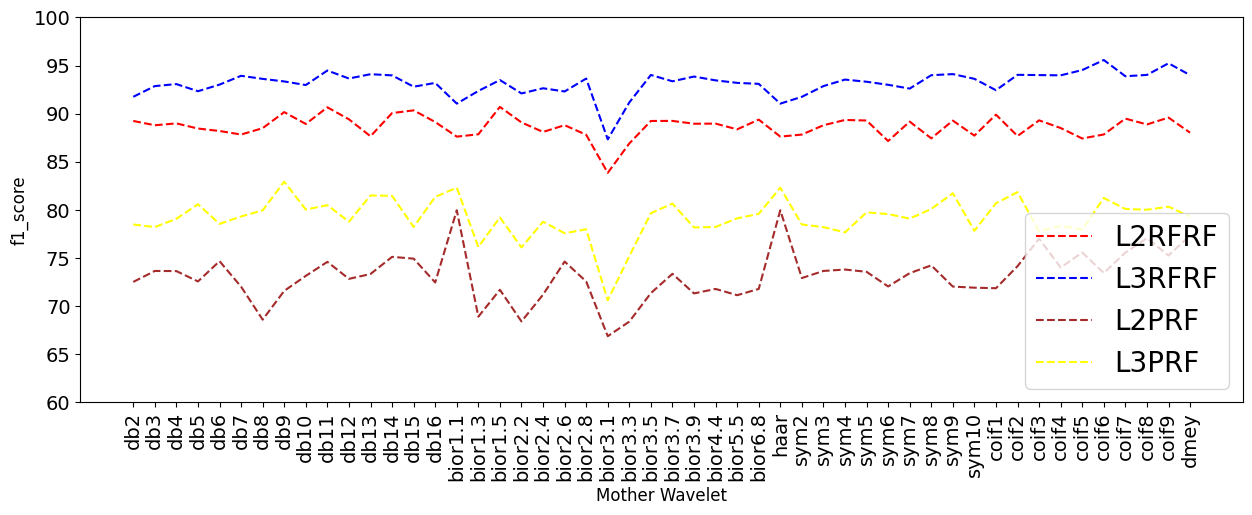

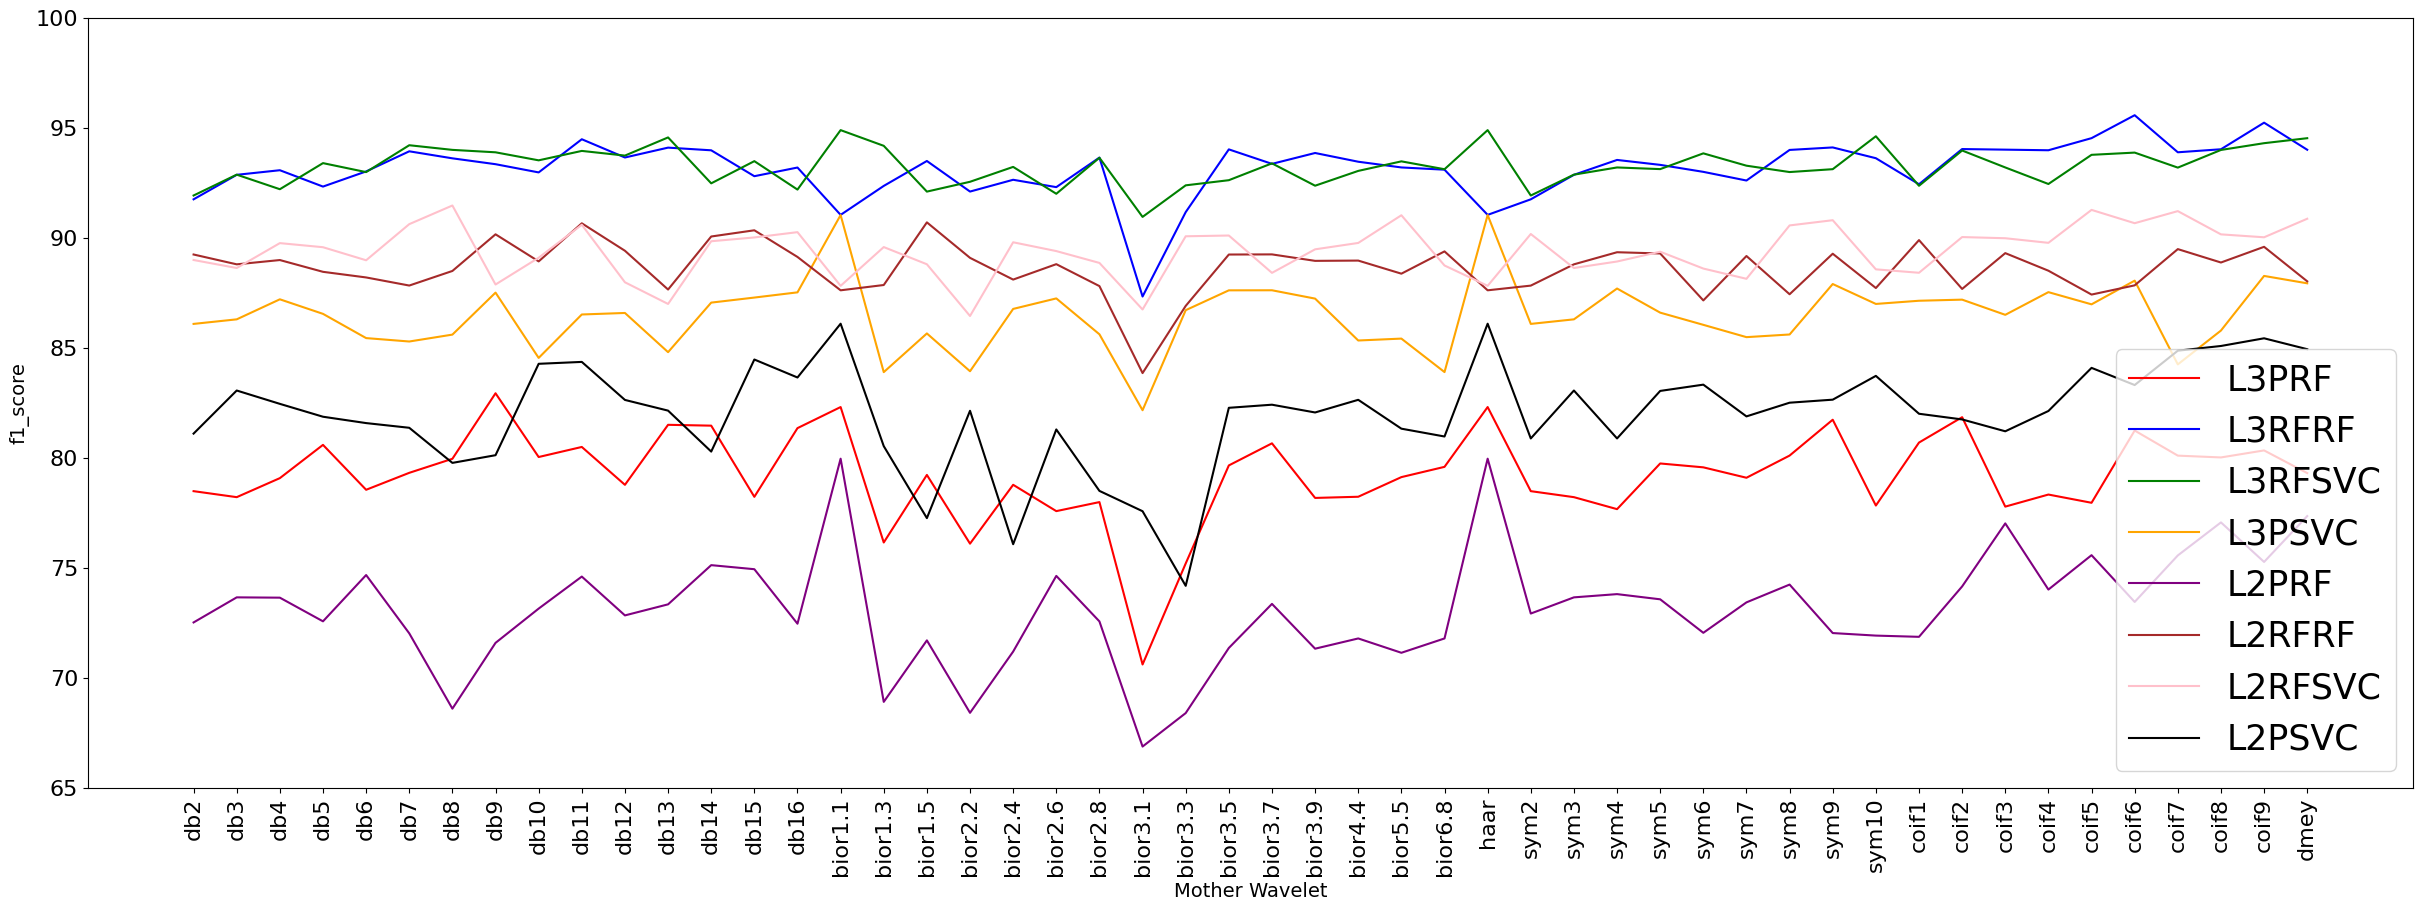

In [ ]:
#ploting dataframe of f1score
X = Ascore['wavelet']
Y = Ascore.drop(['wavelet'], axis = 1)
Y.iloc[:, :] *= 100
coly = Y.columns

#ploting-----------------------------------------------------------------------
k = Y[['L2RFRF','L3RFRF','L2PRF','L3PRF']] 
kcol = k.columns

plt.figure(figsize=(15,5))
colors = ['red', 'blue','brown','yellow']
for i, col in enumerate(kcol):
  plt.plot(X, k[col],'--', color=colors[i])

# add a legend using the column names
plt.legend(kcol,fontsize=20)

# add axis labels and a title
plt.xlabel('Mother Wavelet',fontsize=12)
plt.ylabel('f1_score',fontsize=12)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(60,100)
# plt.title('Line plot of y against x')

# show the plot
plt.show()




#Ploting All columns----------------------------------------------
plt.figure(figsize=(30,10))
# create a line plot for each column with different colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink','black']
for i, col in enumerate(coly):
  plt.plot(X, Y[col], color=colors[i])

# add a legend using the column names
plt.legend(coly,fontsize=25)

# add axis labels and a title
plt.xlabel('Mother Wavelet',fontsize=14)
plt.ylabel('f1_score',fontsize=14)
plt.xticks(rotation=90)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(65,100)
# plt.title('Line plot of y against x')

# show the plot
plt.show()
  

# # plt.plot(wavelets, score_PCA_r, '--',color='blue', linewidth=2)
# plt.plot(wavelets, score_r_r, '--',color='brown', linewidth=2)
# plt.plot(wavelets, score_r_svc, '--',color='yellow', linewidth=2)
# plt.plot(wavelets, score_p_svc, '--',color='black', linewidth=2)


# # plt.title('Score Trend of All Wavelets')
# plt.xlabel('Wavelet')
# plt.ylabel('Score')
# plt.xticks(rotation=90)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.ylim(65,100)
# plt.show()

# Ploting f1_score using f1_score csv file

In [84]:
#read csv to plot f1-score 
path1 = '/content/drive/MyDrive/f1_withoutoptimization.csv'
df = pd.read_csv(path1,sep='\t')
df = df.drop(['Unnamed: 0'], axis = 1)

In [85]:
df.head()

,wavelet,L3RFRF,L3RFSVC,L2RFRF,L2RFSVC,L3RFMLP,L2RFMLP
0,db2,0.923430,0.889147,0.896485,0.849134,0.920947,0.897508
1,db3,0.926868,0.916677,0.902937,0.870152,0.934944,0.899978
2,db4,0.934902,0.912023,0.896806,0.865027,0.927490,0.897259
3,db5,0.932398,0.899072,0.898605,0.859212,0.924502,0.893703
4,db6,0.938432,0.905852,0.895626,0.854324,0.933704,0.876305


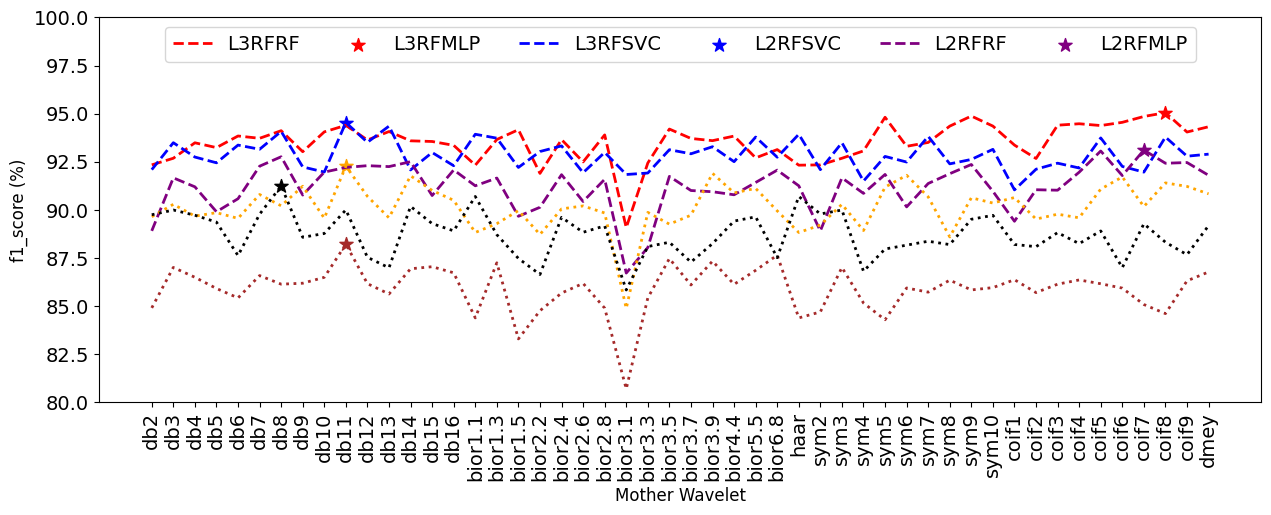

In [91]:
#ploting dataframe of f1score
X = df['wavelet']
Y = df.drop(['wavelet'], axis = 1)
Y.iloc[:, :] *= 100
coly = Y.columns

#ploting-----------------------------------------------------------------------
k = Y[['L3RFRF','L3RFMLP','L3RFSVC','L2RFSVC','L2RFRF','L2RFMLP']] 
kcol = k.columns

plt.figure(figsize=(15,5))
colors = ['red', 'blue','purple','brown','orange','black']
line = ['--','--','--',':',':',':']
for i, col in enumerate(kcol):
  plt.plot(X, k[col],linestyle = line[i],linewidth = 2, color=colors[i])
  
  max_idx = k[col].idxmax()
  plt.scatter(X[max_idx], k[col][max_idx], color=colors[i], marker='*', s=100)

# add a legend using the column names
# set the position of the legend at the top and outside the plot area
plt.legend(kcol,fontsize=14,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)


# add axis labels and a title
plt.xlabel('Mother Wavelet',fontsize=12)
plt.ylabel('f1_score (%)',fontsize=12)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(80,100)
# plt.title('Line plot of y against x')

# show the plot
plt.show()


# CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
test_confu_matrix = confusion_matrix(y_test,  y_pred)

In [ ]:
# confusion matrix
import seaborn as sns
plt.figure(2,figsize=(3,3))
# sns.heatmap(test_confu_matrix, annot = True,
# xticklabels=Labels, yticklabels=Labels, cmap = "Blues")
# plt.title('Test Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()
sns.heatmap(test_confu_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()